# Does school funding impact students academic performance?

<img src="images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# read file
df = pd.read_csv('20210111/final_merged.csv', index_col = 0)
df

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
9438,10017,NaN,NaN,NaN,NaN,Hispanic,NaN,1.0,1.0,2464.90,60.0,60.0,51.0,12.0,12.0,0.0,1.0,1.0,4.0,7.0
9440,10017,NaN,NaN,NaN,NaN,Black,NaN,1.0,1.0,2419.60,84.0,84.0,72.0,20.0,20.0,0.0,0.0,0.0,3.0,17.0
9439,10017,NaN,NaN,NaN,NaN,Black,NaN,1.0,2.0,2403.70,92.0,92.0,72.0,22.0,22.0,0.0,0.0,0.0,0.0,22.0
9437,10017,NaN,NaN,NaN,NaN,Hispanic,NaN,1.0,2.0,2431.30,80.0,80.0,51.0,16.0,16.0,0.0,0.0,0.0,1.0,15.0
9442,10033,NaN,NaN,NaN,NaN,White,NaN,3.0,1.0,2491.45,602.0,602.0,57.0,55.0,55.0,2.0,11.0,13.0,14.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.0,Asian or Pacific Islander,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6848,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.0,American Indian/Alaska Native,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2635,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.0,Hispanic,173.0,37.0,2.0,2508.35,288.0,288.0,39.0,38.0,38.0,1.0,5.0,6.0,11.0,21.0
7903,77032,SBE - AUDEO CHARTER II,287.0,0.0,0.0,Hawaiian Native/Pacific Islander,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met'],
      dtype='object')

In [4]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Hispanic', 'Black', 'White', 'Two or More Races', 'Filipino',
       'Asian or Pacific Islander', 'Hawaiian Native/Pacific Islander',
       'American Indian/Alaska Native'], dtype=object)

In [5]:
# filtering for ethiniticies of interest
# Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander', 'Two or More Races']

# Step 2: filter based on the list above
#df = df[df['Subgroup ID'].isin(list1)]
#df.head(5)

In [6]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [7]:
# filtering office of education out of the main dataset for analysis
# dataset containing only districts called office of education:
OFFICE_OF_EDUCATION = df[df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
print(OFFICE_OF_EDUCATION.shape)

# filter office of education out of the main dataset
df = df[~df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]

# filter Charters out of the main dataset
df = df[~df['Agency Name'].str.contains('SBE - AUDEO CHARTER')]

# sort by alphabetical oder on Agency Name
df = df.sort_values(['Agency Name'])
df

(0, 20)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
2965,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,2.0,2543.757143,4655.0,4655.0,689.0,665.0,665.0,171.0,197.0,368.0,179.0,118.0
1,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Black,1791.0,19.0,1.0,2520.542857,6447.0,6440.0,948.0,921.0,920.0,178.0,312.0,491.0,217.0,213.0
1258,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,1.0,2516.100000,35343.0,35336.0,5166.0,5049.0,5048.0,928.0,1561.0,2490.0,1321.0,1238.0
1257,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,2.0,2502.342857,35595.0,35574.0,5166.0,5085.0,5082.0,710.0,1116.0,1826.0,1577.0,1679.0
0,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Black,1791.0,19.0,2.0,2502.514286,6503.0,6503.0,948.0,929.0,929.0,125.0,217.0,342.0,281.0,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hispanic,4038.0,36.0,2.0,2475.757143,14028.0,14021.0,2028.0,2004.0,2003.0,159.0,366.0,525.0,576.0,902.0
9436,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Two or More Races,807.0,36.0,2.0,2535.000000,287.0,287.0,14.0,13.0,13.0,2.0,3.0,5.0,3.0,5.0
8101,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hawaiian Native/Pacific Islander,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Black,153.0,36.0,2.0,2471.240000,567.0,567.0,65.0,64.0,64.0,4.0,6.0,10.0,21.0,33.0


In [8]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df['Total Enrollment'].describe()

count      8047.000000
mean       9404.304834
std       28692.492602
min         251.000000
25%        1257.000000
50%        3799.000000
75%       10587.500000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [9]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Revenue per student'].describe()

count     8047.000000
mean      9583.094327
std       4415.660649
min          0.000000
25%       7609.450000
50%       9511.360000
75%      11599.460000
max      77687.500000
Name: Revenue per student, dtype: float64

In [10]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[~(df['Revenue per student'] > 20_000)]
df = df[~(df['Revenue per student'] == 0)]

print(df_high_funding.shape)


(89, 20)


In [11]:
# checking the school districts that have revenue per student higher than 20,000
df_high_funding['Agency Name'].unique()

array(['BAYSHORE ELEMENTARY', 'BYRON UNION ELEMENTARY', 'EMERY UNIFIED',
       'KLAMATH-TRINITY JOINT UNIFIED', 'LAWNDALE ELEMENTARY',
       'MOUNT PLEASANT ELEMENTARY', 'TAFT UNION HIGH',
       'VAL VERDE UNIFIED', 'WOODSIDE ELEMENTARY'], dtype=object)

In [12]:
# Checking what the dataset looks like now
df.shape

(7771, 20)

--------------------

# DATASET TEST ID 1

In [13]:
# splitting the main dataset into test 1 and test 2 datasets
# then, splitting test 1 dataset into several datasets according to total enrollment

# Filter based on TEST ID1
list = ['1.0']
test_Id1 = df[df['Test Id'].isin(list)]
test_ID1 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID1


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1,ABC UNIFIED,20722.0,10918.40,Black,1791.0,2520.542857,948.0,921.0,178.0,312.0,217.0,213.0
1258,ABC UNIFIED,20722.0,10918.40,Hispanic,9425.0,2516.100000,5166.0,5049.0,928.0,1561.0,1321.0,1238.0
2966,ABC UNIFIED,20722.0,10918.40,White,1302.0,2556.900000,689.0,662.0,218.0,231.0,124.0,89.0
7049,ABC UNIFIED,20722.0,10918.40,Hawaiian Native/Pacific Islander,158.0,2543.375000,61.0,61.0,15.0,14.0,19.0,13.0
8103,ABC UNIFIED,20722.0,10918.40,Two or More Races,524.0,2585.557143,347.0,341.0,162.0,110.0,38.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,9389.51,Black,153.0,2516.920000,65.0,64.0,7.0,18.0,21.0,18.0
4668,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,9389.51,White,4720.0,2528.800000,2494.0,2443.0,548.0,850.0,555.0,488.0
9435,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,9389.51,Two or More Races,807.0,2532.800000,14.0,13.0,2.0,3.0,4.0,4.0
2964,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,9389.51,Hispanic,4038.0,2491.314286,2028.0,2006.0,219.0,590.0,535.0,660.0


In [14]:
test_ID1['Agency Name'].nunique()

725

In [15]:
corr = test_ID1.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
Total Enrollment,1.000000,0.104852,0.490477,0.009453,0.474528,0.473189,0.504338,0.481245,0.442403,0.429851
Revenue per student,0.104852,1.000000,0.058293,-0.303617,0.065872,0.066584,-0.034500,0.051344,0.083366,0.095499
Count Enrollment per ethnicity,0.490477,0.058293,1.000000,-0.028354,0.993383,0.992873,0.801815,0.981474,0.986897,0.975120
Mean Scale Score,0.009453,-0.303617,-0.028354,1.000000,-0.050675,-0.051292,0.132970,-0.022378,-0.084562,-0.109919
CAASPP Reported Enrollment,0.474528,0.065872,0.993383,-0.050675,1.000000,0.999968,0.816511,0.991257,0.993046,0.977642
Students Tested,0.473189,0.066584,0.992873,-0.051292,0.999968,1.000000,0.816458,0.991392,0.993203,0.977556
Total Standard Exceeded,0.504338,-0.034500,0.801815,0.132970,0.816511,0.816458,1.000000,0.862708,0.747086,0.684509
Total Standard Met,0.481245,0.051344,0.981474,-0.022378,0.991257,0.991392,0.862708,1.000000,0.976438,0.944230
Total Standard Nearly Met,0.442403,0.083366,0.986897,-0.084562,0.993046,0.993203,0.747086,0.976438,1.000000,0.990539
Total Standard Not Met,0.429851,0.095499,0.975120,-0.109919,0.977642,0.977556,0.684509,0.944230,0.990539,1.000000


In [16]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander']

# Step 2: filter based on the list above
#test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
#test_ID1.head(5)

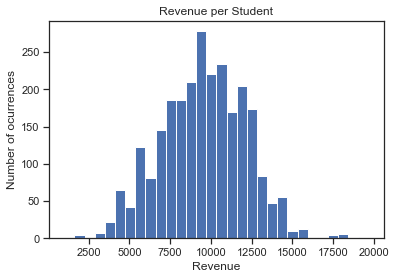

In [17]:
_ = plt.hist(test_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

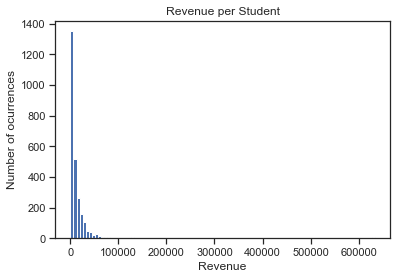

In [18]:
_ = plt.hist(test_ID1['Total Enrollment'], density=False, bins=100)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

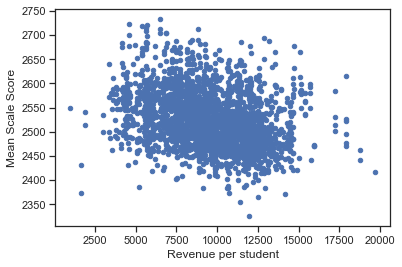

In [19]:
scatterplot1 = test_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

# PASS/FAIL Dataset - Test ID 1

In [20]:
# adding pass and fail columns 
test_ID1['Pass'] = test_ID1['Total Standard Exceeded'] + test_ID1['Total Standard Met']
test_ID1['Fail'] = test_ID1['Total Standard Nearly Met'] + test_ID1['Total Standard Not Met']

# creating a new dataframe by copying
pass_fail_df = test_ID1.copy()

# dropping columns
pass_fail_df = pass_fail_df.drop(['Total Standard Exceeded', 'Total Standard Met', 'Total Standard Nearly Met', 
               'Total Standard Not Met', 'CAASPP Reported Enrollment', 'Count Enrollment per ethnicity'], axis=1)

#rearranging columns
pass_fail_df = pass_fail_df.reindex(columns=['Agency Name', 'Subgroup ID','Revenue per student', 
                                             'Mean Scale Score', 'Students Tested',
                                             'Pass', 'Fail'])

pass_fail_df.head(15)

,Agency Name,Subgroup ID,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
1,ABC UNIFIED,Black,10918.40,2520.542857,921.0,490.0,430.0
1258,ABC UNIFIED,Hispanic,10918.40,2516.100000,5049.0,2489.0,2559.0
2966,ABC UNIFIED,White,10918.40,2556.900000,662.0,449.0,213.0
7049,ABC UNIFIED,Hawaiian Native/Pacific Islander,10918.40,2543.375000,61.0,29.0,32.0
8103,ABC UNIFIED,Two or More Races,10918.40,2585.557143,341.0,272.0,69.0
4669,ABC UNIFIED,Asian or Pacific Islander,10918.40,2615.285714,2695.0,2359.0,336.0
2,ACALANES UNION HIGH,Black,6853.87,2561.900000,24.0,11.0,13.0
8105,ACALANES UNION HIGH,Two or More Races,6853.87,2704.300000,78.0,72.0,6.0
1259,ACALANES UNION HIGH,Hispanic,6853.87,2645.800000,136.0,101.0,35.0
2968,ACALANES UNION HIGH,White,6853.87,2675.500000,859.0,721.0,138.0


In [21]:
# correlation between the variables
corr = pass_fail_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
Revenue per student,1.000000,-0.303617,0.066584,0.020553,0.090905
Mean Scale Score,-0.303617,1.000000,-0.051292,0.035704,-0.100114
Students Tested,0.066584,-0.051292,1.000000,0.958338,0.985979
Pass,0.020553,0.035704,0.958338,1.000000,0.897238
Fail,0.090905,-0.100114,0.985979,0.897238,1.000000


### The table below contains ethinicity as columns. The values in the first table use the mean scale score. This reshape was done with pass and fail as the values in the sequence.

In [22]:
# Construct tables where each ethinicity is a column and the value is: mean scale score, pass, and fail
# run the correlation table again for each of the cases

# mean scale score as values per ethinicity
mean_score_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Mean Scale Score")
mean_score_df = mean_score_df.reset_index()
mean_score_df

Subgroup ID,Agency Name,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
0,ABC UNIFIED,10918.40,NaN,2615.285714,2520.542857,2543.375,2516.100000,2585.557143,2556.900000
1,ACALANES UNION HIGH,6853.87,NaN,2703.800000,2561.900000,NaN,2645.800000,2704.300000,2675.500000
2,ACKERMAN CHARTER,7525.60,NaN,NaN,NaN,NaN,2488.200000,NaN,2560.033333
3,ACTON-AGUA DULCE UNIFIED,2998.30,NaN,NaN,NaN,NaN,2499.928571,NaN,2534.557143
4,ADELANTO ELEMENTARY,11684.48,NaN,2551.800000,2418.814286,2530.100,2452.700000,2440.842857,2455.728571
...,...,...,...,...,...,...,...,...,...
727,YOSEMITE UNIFIED,7869.74,NaN,NaN,NaN,NaN,2478.300000,2534.950000,2514.114286
728,YREKA UNION ELEMENTARY,9839.42,2466.2,NaN,NaN,NaN,2483.800000,NaN,2507.000000
729,YREKA UNION HIGH,10782.33,NaN,NaN,NaN,NaN,2562.600000,2611.600000,2625.300000
730,YUBA CITY UNIFIED,10334.16,NaN,2521.942857,2462.283333,NaN,2478.942857,2507.042857,2518.485714


### The correlation map below is looking at MEAN SCALE SCORE as the dependent variable

In [23]:
# correlation between the variables
corr1 = mean_score_df.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,-0.239123,-0.395309,-0.404135,-0.278300,-0.233170,-0.390950,-0.282599
American Indian/Alaska Native,-0.239123,1.000000,0.619244,0.621283,0.656673,0.692269,0.684441,0.716390
Asian or Pacific Islander,-0.395309,0.619244,1.000000,0.771756,0.649170,0.794150,0.825658,0.864270
Black,-0.404135,0.621283,0.771756,1.000000,0.677613,0.796477,0.778638,0.787196
Hawaiian Native/Pacific Islander,-0.278300,0.656673,0.649170,0.677613,1.000000,0.720976,0.557734,0.566227
Hispanic,-0.233170,0.692269,0.794150,0.796477,0.720976,1.000000,0.778428,0.809320
Two or More Races,-0.390950,0.684441,0.825658,0.778638,0.557734,0.778428,1.000000,0.866568
White,-0.282599,0.716390,0.864270,0.787196,0.566227,0.809320,0.866568,1.000000


### The correlation map below is looking at PASS as the dependent variable

In [24]:
# pass as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
pass_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Pass")
pass_df = pass_df.reset_index()


# correlation between the variables
corr2 = pass_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,0.148613,-0.133538,0.157855,0.192747,0.135713,-0.108648,-0.141410
American Indian/Alaska Native,0.148613,1.000000,0.463027,0.803822,0.717610,0.752219,0.525672,0.680088
Asian or Pacific Islander,-0.133538,0.463027,1.000000,0.411853,0.487814,0.381821,0.586989,0.485260
Black,0.157855,0.803822,0.411853,1.000000,0.885576,0.922288,0.596336,0.656418
Hawaiian Native/Pacific Islander,0.192747,0.717610,0.487814,0.885576,1.000000,0.791097,0.657397,0.718289
Hispanic,0.135713,0.752219,0.381821,0.922288,0.791097,1.000000,0.507805,0.648421
Two or More Races,-0.108648,0.525672,0.586989,0.596336,0.657397,0.507805,1.000000,0.813112
White,-0.141410,0.680088,0.485260,0.656418,0.718289,0.648421,0.813112,1.000000


In [25]:
pass_df

Subgroup ID,Agency Name,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
0,ABC UNIFIED,10918.40,NaN,2359.0,490.0,29.0,2489.0,272.0,449.0
1,ACALANES UNION HIGH,6853.87,NaN,195.0,11.0,NaN,101.0,72.0,721.0
2,ACKERMAN CHARTER,7525.60,NaN,NaN,NaN,NaN,5.0,NaN,217.0
3,ACTON-AGUA DULCE UNIFIED,2998.30,NaN,NaN,NaN,NaN,109.0,NaN,190.0
4,ADELANTO ELEMENTARY,11684.48,NaN,9.0,165.0,8.0,859.0,33.0,127.0
...,...,...,...,...,...,...,...,...,...
727,YOSEMITE UNIFIED,7869.74,NaN,NaN,NaN,NaN,37.0,15.0,277.0
728,YREKA UNION ELEMENTARY,9839.42,35.0,NaN,NaN,NaN,37.0,NaN,180.0
729,YREKA UNION HIGH,10782.33,NaN,NaN,NaN,NaN,9.0,14.0,63.0
730,YUBA CITY UNIFIED,10334.16,NaN,697.0,25.0,NaN,1004.0,166.0,898.0


### The correlation map below is looking at FAIL as the dependent variable

In [26]:
# fail as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
fail_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Fail")
fail_df = fail_df.reset_index()


# correlation between the variables
corr2 = fail_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,0.216812,0.052682,0.196728,0.228600,0.147484,0.078544,-0.018685
American Indian/Alaska Native,0.216812,1.000000,0.461975,0.631271,0.496250,0.460803,0.382062,0.463858
Asian or Pacific Islander,0.052682,0.461975,1.000000,0.605753,0.723387,0.485178,0.688857,0.488100
Black,0.196728,0.631271,0.605753,1.000000,0.752165,0.896418,0.652665,0.658555
Hawaiian Native/Pacific Islander,0.228600,0.496250,0.723387,0.752165,1.000000,0.606042,0.739165,0.585835
Hispanic,0.147484,0.460803,0.485178,0.896418,0.606042,1.000000,0.522631,0.653205
Two or More Races,0.078544,0.382062,0.688857,0.652665,0.739165,0.522631,1.000000,0.719825
White,-0.018685,0.463858,0.488100,0.658555,0.585835,0.653205,0.719825,1.000000


In [27]:
# Scatterplot with revenue vs pass and fail as dummy vars?

-----------

# TEST ID 1 DATASET - Split into 6 datasets based on total enrollment

## Large districts: above 60,000 total enrollment

The scatter plots take a long time to process. One way to speed up the process and visualize some relationship between
ethinicity and revenue per student is by selecting fewer racial groups. 

In [28]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
list1 = ['White', 'Black', 'Hispanic']

# Step 2: filter based on the list above
test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
test_ID1.head(5)

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
1,ABC UNIFIED,20722.0,10918.40,Black,1791.0,2520.542857,948.0,921.0,178.0,312.0,217.0,213.0,490.0,430.0
1258,ABC UNIFIED,20722.0,10918.40,Hispanic,9425.0,2516.100000,5166.0,5049.0,928.0,1561.0,1321.0,1238.0,2489.0,2559.0
2966,ABC UNIFIED,20722.0,10918.40,White,1302.0,2556.900000,689.0,662.0,218.0,231.0,124.0,89.0,449.0,213.0
2,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2561.900000,25.0,24.0,5.0,6.0,5.0,8.0,11.0,13.0
1259,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2645.800000,147.0,136.0,57.0,44.0,22.0,13.0,101.0,35.0


In [29]:
# filtering based on total enrollment
large_districts_ID1 = test_ID1[test_ID1['Total Enrollment'] >= 60_000]
print(large_districts_ID1.shape)

# there are 2 school dsitricts with enrollment larger or equal to 100,000
large_districts_ID1['Agency Name'].unique()

(18, 14)


array(['ELK GROVE UNIFIED', 'FRESNO UNIFIED', 'LONG BEACH UNIFIED',
       'LOS ANGELES UNIFIED', 'SAN DIEGO UNIFIED',
       'SAN FRANCISCO UNIFIED'], dtype=object)

In [30]:
large_districts_ID1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1681 to 2553
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agency Name                     18 non-null     object 
 1   Total Enrollment                18 non-null     float64
 2   Revenue per student             18 non-null     float64
 3   Subgroup ID                     18 non-null     object 
 4   Count Enrollment per ethnicity  18 non-null     float64
 5   Mean Scale Score                18 non-null     float64
 6   CAASPP Reported Enrollment      18 non-null     float64
 7   Students Tested                 18 non-null     float64
 8   Total Standard Exceeded         18 non-null     float64
 9   Total Standard Met              18 non-null     float64
 10  Total Standard Nearly Met       18 non-null     float64
 11  Total Standard Not Met          18 non-null     float64
 12  Pass                            1

In [31]:
# correlation between the variables
corr2 = large_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.486950,0.633983,-0.020007,0.627710,0.626321,0.726353,0.635325,0.597462,0.596032,0.671880,0.596948
Revenue per student,0.486950,1.000000,0.325305,-0.124319,0.339327,0.340643,0.323926,0.338061,0.335466,0.340077,0.338116,0.338478
Count Enrollment per ethnicity,0.633983,0.325305,1.000000,-0.115544,0.999445,0.999351,0.919099,0.997156,0.997627,0.994031,0.986046,0.996032
Mean Scale Score,-0.020007,-0.124319,-0.115544,1.000000,-0.114564,-0.114085,0.162109,-0.071690,-0.144853,-0.187023,-0.000157,-0.170648
CAASPP Reported Enrollment,0.627710,0.339327,0.999445,-0.114564,1.000000,0.999994,0.919504,0.998087,0.998546,0.994369,0.986826,0.996597
Students Tested,0.626321,0.340643,0.999351,-0.114085,0.999994,1.000000,0.919305,0.998120,0.998615,0.994372,0.986787,0.996626
Total Standard Exceeded,0.726353,0.323926,0.919099,0.162109,0.919504,0.919305,1.000000,0.939394,0.898816,0.873815,0.970509,0.884113
Total Standard Met,0.635325,0.338061,0.997156,-0.071690,0.998087,0.998120,0.939394,1.000000,0.994484,0.986132,0.994337,0.989988
Total Standard Nearly Met,0.597462,0.335466,0.997627,-0.144853,0.998546,0.998615,0.898816,0.994484,1.000000,0.997486,0.977880,0.999066
Total Standard Not Met,0.596032,0.340077,0.994031,-0.187023,0.994369,0.994372,0.873815,0.986132,0.997486,1.000000,0.964257,0.999616


## Medium districts: between 30,000 and 60,000 total enrollment

In [32]:
# filtering based on size
medium_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 60_000) & (test_ID1['Total Enrollment'] >= 30_000)]
print(medium_districts_ID1.shape)

# checking number of school districts which is 8
print(medium_districts_ID1['Agency Name'].unique())

medium_districts_ID1.head(5)

(81, 14)
['ANAHEIM UNION HIGH' 'BAKERSFIELD CITY' 'CAPISTRANO UNIFIED'
 'CHULA VISTA ELEMENTARY' 'CLOVIS UNIFIED' 'CORONA-NORCO UNIFIED'
 'FONTANA UNIFIED' 'FREMONT UNIFIED' 'GARDEN GROVE UNIFIED'
 'IRVINE UNIFIED' 'KERN HIGH' 'LODI UNIFIED' 'MORENO VALLEY UNIFIED'
 'MT. DIABLO UNIFIED' 'OAKLAND UNIFIED' 'POWAY UNIFIED'
 'RIVERSIDE UNIFIED' 'SACRAMENTO CITY UNIFIED'
 'SAN BERNARDINO CITY UNIFIED' 'SAN JOSE UNIFIED' 'SAN JUAN UNIFIED'
 'SAN RAMON VALLEY UNIFIED' 'SANTA ANA UNIFIED' 'STOCKTON UNIFIED'
 'SWEETWATER UNION HIGH' 'TWIN RIVERS UNIFIED' 'WEST CONTRA COSTA UNIFIED']


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
3007,ANAHEIM UNION HIGH,30731.0,11382.87,White,3135.0,2570.733333,1554.0,1484.0,297.0,531.0,329.0,325.0,828.0,654.0
1300,ANAHEIM UNION HIGH,30731.0,11382.87,Hispanic,20555.0,2523.366667,10216.0,9940.0,841.0,2635.0,2704.0,3758.0,3476.0,6462.0
32,ANAHEIM UNION HIGH,30731.0,11382.87,Black,716.0,2540.533333,360.0,352.0,46.0,105.0,88.0,112.0,151.0,200.0
56,BAKERSFIELD CITY,30372.0,12540.99,Black,2422.0,2429.400000,1518.0,1465.0,88.0,213.0,338.0,826.0,301.0,1164.0
1337,BAKERSFIELD CITY,30372.0,12540.99,Hispanic,23959.0,2462.333333,15534.0,15277.0,1460.0,3514.0,3908.0,6391.0,4974.0,10299.0


In [33]:
# correlation between the variables
corr2 = medium_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.090282,0.267517,0.008583,0.248136,0.247190,0.214182,0.253797,0.224729,0.194961,0.248062,0.209619
Revenue per student,0.090282,1.000000,0.118895,-0.365897,0.118274,0.119254,-0.257955,0.000525,0.201235,0.293974,-0.112245,0.260263
Count Enrollment per ethnicity,0.267517,0.118895,1.000000,-0.079794,0.980380,0.978609,0.644296,0.934100,0.956862,0.875604,0.850155,0.920171
Mean Scale Score,0.008583,-0.365897,-0.079794,1.000000,-0.101792,-0.101273,0.400204,0.105953,-0.193650,-0.396898,0.239179,-0.319734
CAASPP Reported Enrollment,0.248136,0.118274,0.980380,-0.101792,1.000000,0.999859,0.662920,0.952127,0.977485,0.893965,0.869263,0.939693
Students Tested,0.247190,0.119254,0.978609,-0.101273,0.999859,1.000000,0.661957,0.951655,0.978354,0.894541,0.868555,0.940396
Total Standard Exceeded,0.214182,-0.257955,0.644296,0.400204,0.662920,0.661957,1.000000,0.824866,0.503876,0.277173,0.938836,0.372789
Total Standard Met,0.253797,0.000525,0.934100,0.105953,0.952127,0.951655,0.824866,1.000000,0.889784,0.717904,0.969093,0.797132
Total Standard Nearly Met,0.224729,0.201235,0.956862,-0.193650,0.977485,0.978354,0.503876,0.889784,1.000000,0.945828,0.761885,0.980342
Total Standard Not Met,0.194961,0.293974,0.875604,-0.396898,0.893965,0.894541,0.277173,0.717904,0.945828,1.000000,0.558258,0.991294


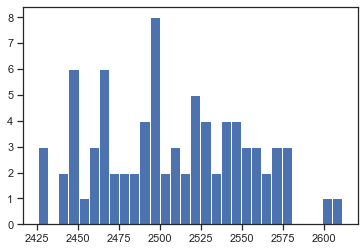

In [34]:
#medium_districts_ID1 = medium_districts_ID1[~(medium_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(medium_districts_ID1['Mean Scale Score'], density=False, bins=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

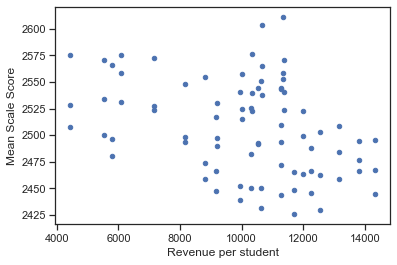

In [35]:
scatterplot1 = medium_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

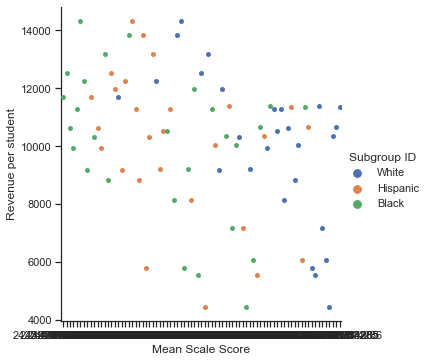

In [36]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=medium_districts_ID1)

## Small districts: between 10,000 and 30,000 total enrollment

In [37]:
small_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 30_000) & (test_ID1['Total Enrollment'] >= 10_000)]
print(small_districts_ID1.shape)


small_districts_ID1.head(5)

(391, 14)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
1,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2520.542857,948.0,921.0,178.0,312.0,217.0,213.0,490.0,430.0
1258,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,5166.0,5049.0,928.0,1561.0,1321.0,1238.0,2489.0,2559.0
2966,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,689.0,662.0,218.0,231.0,124.0,89.0,449.0,213.0
2971,ACTON-AGUA DULCE UNIFIED,10000.0,2998.3,White,4199.0,2534.557143,322.0,317.0,71.0,119.0,65.0,62.0,190.0,127.0
1263,ACTON-AGUA DULCE UNIFIED,10000.0,2998.3,Hispanic,3466.0,2499.928571,275.0,267.0,28.0,81.0,90.0,68.0,109.0,158.0


In [38]:
# correlation between the variables
corr2 = small_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.130976,0.337901,0.011472,0.314094,0.314195,0.297492,0.341830,0.294857,0.237693,0.338331,0.264151
Revenue per student,0.130976,1.000000,0.128903,-0.316142,0.145724,0.148188,-0.099963,0.075992,0.187823,0.245275,0.008198,0.224657
Count Enrollment per ethnicity,0.337901,0.128903,1.000000,-0.057256,0.969597,0.968731,0.703773,0.948591,0.952078,0.872234,0.889746,0.915854
Mean Scale Score,0.011472,-0.316142,-0.057256,1.000000,-0.151764,-0.155019,0.307185,-0.005790,-0.234749,-0.372138,0.120243,-0.320188
CAASPP Reported Enrollment,0.314094,0.145724,0.969597,-0.151764,1.000000,0.999880,0.707710,0.965000,0.983015,0.918256,0.901814,0.956236
Students Tested,0.314195,0.148188,0.968731,-0.155019,0.999880,1.000000,0.704270,0.964439,0.984085,0.919756,0.900068,0.957577
Total Standard Exceeded,0.297492,-0.099963,0.703773,0.307185,0.707710,0.704270,1.000000,0.833185,0.582618,0.391349,0.935564,0.474893
Total Standard Met,0.341830,0.075992,0.948591,-0.005790,0.965000,0.964439,0.833185,1.000000,0.924526,0.786382,0.974791,0.852936
Total Standard Nearly Met,0.294857,0.187823,0.952078,-0.234749,0.983015,0.984085,0.582618,0.924526,1.000000,0.949794,0.825495,0.982174
Total Standard Not Met,0.237693,0.245275,0.872234,-0.372138,0.918256,0.919756,0.391349,0.786382,0.949794,1.000000,0.660101,0.991676


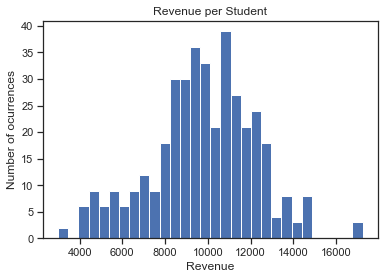

In [39]:
_ = plt.hist(small_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

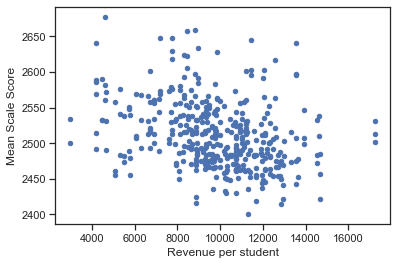

In [40]:
scatterplot = small_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [ ]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=small_districts_ID1)

## Smaller districts: between 10,000 and 5,000 total enrollment

In [ ]:
smaller_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 10_000) & (test_ID1['Total Enrollment'] >= 5_000)]
print(smaller_districts_ID1.shape)


smaller_districts_ID1.head(5)

In [ ]:
# correlation between the variables
corr1 = smaller_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [ ]:
_ = plt.hist(smaller_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

In [ ]:
_ = plt.hist(smaller_districts_ID1['Mean Scale Score'], density=False, bins=30)

In [ ]:
scatterplot = smaller_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [ ]:
_ = sns.catplot(x="Revenue per student", y='Mean Scale Score', hue="Subgroup ID", kind="swarm", data=smaller_districts_ID1)

## Tiny districts: between 5,000 and 1,000 total enrollment

In [ ]:
tiny_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 5_000) & (test_ID1['Total Enrollment'] >= 1000)]
print(tiny_districts_ID1.shape)


tiny_districts_ID1.head(5)

In [ ]:
# correlation between the variables 1k to 5k enrolled
corr1 = tiny_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [ ]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

In [ ]:
scatterplot1 = tiny_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [ ]:
#_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=tiny_districts_ID1)

## Mini districts: total enrollment less than 1,000

In [ ]:
mini_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 1000)]
print(mini_districts_ID1.shape)

mini_districts_ID1.head(5)

In [ ]:
# correlation between the variables
corr1 = mini_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [ ]:
_ = plt.hist(mini_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

In [ ]:
scatterplot1 = mini_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

---------------

# DATASET TEST ID 2

In [ ]:
# Filter based on TEST ID2
list = ['2.0']
test_Id2 = df[df['Test Id'].isin(list)]
test_ID2 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID2.head(5)


In [ ]:
_ = plt.hist(test_ID2['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")



In [ ]:
scatterplot1 = test_ID2[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [ ]:
corr = test_ID2.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

## Conclusions (as of now):
1. The correlation between revenue per student and students' outcome seem to vary significantly according to district size.

## Observations:
1. We don't have the data overtime. It'll be hard to come to a conclusion if revenue is affecting test scores if we don't know what the test scores and revenue have been in the past.
2. Our conclusions will be based on the year we have the data for.

## NEXT STEPS:
1. Run a best fit line for each ethinicity and outcome**. It will help to better understand the relationship between revenue and test score according to each racial group.
    a. Outcome (we have outcome in different forms): mean scale score, pass, fail, and the original system (exceeded, met, nearly met and didn't meet standards).
    b. Clean up this file. Keep what is relevant. Organize the kernels to have a better flow of information.
2. Merge poverty dataset from Census?
3. Come up with more questions to investigate?